<a href="https://colab.research.google.com/github/rubygitflow/Higher-Math/blob/main/University_of_Artificial_Intelligence_Basic_Mathematics_Lesson_5_Functions_and_surfaces_Part2_Dividing_planes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Курс "Базовая математика"
# Занятие 5. Разделяющие поверхности


# Разделяющие поверхности

In [2]:
import matplotlib.pyplot as plt
import numpy as np


### Вычисление площадей фигур

In [ ]:

class Rectangle():
    def __init__(self, lenght, width):
        self.lenght=lenght
        self.width=width

    def _area(self):
        self.area = self.lenght * self.width
        return self.area

    def _perimeter(self):
        self.perimeter = 2 * (self.lenght + self.width)
        return self.perimeter 

    def points_in_poligon(self, n):

        pos_x = [np.random.randint(0, self.width) for x in range(n)]
        pos_y = [np.random.randint(0, self.lenght) for x in range(n)]
        return np.column_stack([pos_x,pos_y])

In [ ]:
rect = Rectangle(lenght=20, width=15)

In [ ]:
rect._perimeter() 

70

In [ ]:
rect.points_in_poligon(100) 

array([[ 0, 17],
       [ 8,  6],
       [12,  8],
       [12, 14],
       [13, 12],
       [ 2, 16],
       [ 5, 14],
       [ 8, 16],
       [ 8, 15],
       [14,  5],
       [ 0, 18],
       [ 3, 19],
       [ 6, 13],
       [ 2, 16],
       [ 5,  7],
       [ 4, 14],
       [ 3, 12],
       [ 5, 10],
       [ 7,  7],
       [11,  0],
       [ 6, 18],
       [14,  9],
       [10, 18],
       [ 8, 16],
       [ 9, 13],
       [ 6,  9],
       [ 4, 15],
       [12, 17],
       [ 5,  5],
       [11,  2],
       [10,  5],
       [ 4, 12],
       [ 1, 11],
       [ 3,  5],
       [10, 13],
       [ 9,  5],
       [ 6,  5],
       [ 9, 10],
       [ 5, 14],
       [14, 10],
       [ 5,  3],
       [10, 13],
       [10, 19],
       [12, 10],
       [11, 17],
       [ 8, 10],
       [ 0, 18],
       [ 7,  2],
       [ 4,  6],
       [ 8, 10],
       [14, 13],
       [10,  3],
       [14,  8],
       [ 3, 16],
       [ 5, 19],
       [ 7,  6],
       [10,  2],
       [ 4,  9],
       [ 7,  7

In [ ]:
!pip install diversipy==0.8

  Created wheel for diversipy: filename=diversipy-0.8-cp36-none-any.whl size=27513 sha256=a8554cdae1ef249a1aea2a86209f5bae19b83e23d11ff91396503b1537f41bb3
  Stored in directory: /root/.cache/pip/wheels/49/89/f4/1c64e470a0af08f4aefb99efec615e5da7907435b975ab64a6
Successfully built diversipy


In [ ]:
#Семплируем 1000 точек из 4-х мерного гиперкуба
from diversipy.hycusampling import maximin_reconstruction

maximin_reconstruction(1000, 4)

array([[0.65105953, 0.888162  , 0.4091807 , 0.62693715],
       [0.90099407, 0.83031593, 0.99673103, 0.85483176],
       [0.08724369, 0.45511883, 0.45136475, 0.898322  ],
       ...,
       [0.61516817, 0.25129597, 0.77482439, 0.05924276],
       [0.17868751, 0.25462606, 0.08510072, 0.56021676],
       [0.62590373, 0.6340172 , 0.76264753, 0.27245503]])

In [ ]:
# Отличная библиотека для работы с геометрическими фигурами
from shapely.geometry import Polygon
polygon = Polygon([(0, 0), (0, 1), (1, 1),(1,0)])
print(polygon.area)

print(polygon.length)


1.0
4.0


### Разделяющая поверхность

In [ ]:
# Разделяющая поверхность в 2-мерном пространстве задается тремя переменными w_1, w_2, b (для многомерного случая будет {w_1, w_2...w_n, b})
w_1 = 1  # w_1 и w_2 определяют угол наклона прямой к осям x и y
w_2 = 1 
b = 0# bies задает смещение разделяющей поверхности относительно начала координат (0,0)

$w_1 x_1 + w_2 x_2 + b = 0 $ или $\sum_{i = 1}^{2}{w_ix_i}+b=0 $ 

$(w_1,w2)$ является нормалью вектора к разделяющей поверхноси

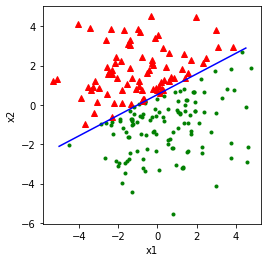

In [ ]:
import seaborn

# Разделяющая поверхность: w1 * x1 + w2 * x2 + b = 0
def line(x1, x2):
    return 1 * x1 - 1.9 * x2 + 1

# служебная функция 
def line_x1(x1):
    return (1 * x1 + 1) / 1.9


# генерируем случайные точки
np.random.seed(0)
x1x2 = np.random.randn(200, 2) * 2

# plt.figure(figsize=(4, 4))
# рисуем сгенерированные точки
for x1, x2 in x1x2:
    value = line(x1, x2)

    # https://devpractice.ru/matplotlib-lesson-4-2-stack-stem-scatter/
    # https://pyprog.pro/mpl/mpl_plot.html
    if (value > 0): # зелёные — выше линии
        plt.plot(x1, x2, 'g.') # , color='seagreen'
    elif (value < 0): # красные — ниже линии
        plt.plot(x1, x2, 'r^') # , color='darkred'

# нормализация осей
plt.gca().set_aspect('equal', adjustable='box')
            
# рисуем разделяющую поверхность
x1_range = np.arange(-5.0, 5.0, 0.5)
plt.plot(x1_range, line_x1(x1_range), color='blue')

# Подписываем оси
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

Расстояние до разделяющей поверхности выражается через:
$D(x) = \frac{|w^Tx+b|}{||w||}$

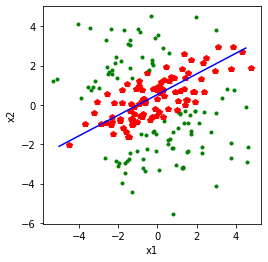

In [ ]:
# генерируем случайные точки
np.random.seed(0)
x1x2 = np.random.randn(200, 2) * 2

# рисуем сгенерированные точки
for x1, x2 in x1x2:    
    value = line(x1, x2)

    # Раскрасим точки, которые далеко отстоят от разделяющей поверхности, в зеленый, а те, что близко - в красный цвета
    if np.abs(value) >= 2.669782705270741:
      plt.plot(x1, x2, '.', color='green')
    else:
      plt.plot(x1, x2, 'p', color='red')
        
# нормализация осей
plt.gca().set_aspect('equal', adjustable='box')
        
# рисуем разделяющую поверхность
x1_range = np.arange(-5.0, 5.0, 0.5)
plt.plot(x1_range, line_x1(x1_range), color='blue')

# Подписываем оси
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()


# ДЗ Лайт



1. Написать классы по аналогии с Rectangle для вычисления площади и периметра следующих фигур: а) Квадрат б) Круг (с использованием полярных координат) в) параллелограм г) Трапеция д) Треугольник е) ромб
Классы должны поддреживать помимо основных формул следующие реализация вычисления площадей:
1) Площадь параллелограма по двум сторонам и углу
2) Площадь треугольника по двум сторонам и углу
3) Площадь ромба по длине стороны и углу
4) Площадь круга через его диаметр


In [ ]:
class Square():
    def __init__(self, side):
        self.side = side

    def _area(self):
        self.area = self.side ** 2
        return self.area

    def _perimeter(self):
        self.perimeter = 4 * (self.side)
        return self.perimeter

class Circle():
    def __init__(self, diameter):
        self.diameter = diameter

    def _area(self):
        self.area = np.pi * (self.diameter / 2.) ** 2
        return self.area

    def _perimeter(self):
        self.perimeter = np.pi * self.diameter
        return self.perimeter
        
class Parallelogram():
    def __init__(self, a, b, gamma):
        self.a = a
        self.b = b
        self.gamma = gamma

    def _area(self):
        self.area =  np.sin(self.gamma) * self.a * self.b
        return self.area

    def _perimeter(self):
        self.perimeter =  2 * (self.a + self.b)
        return self.perimeter
        
class Trapezoid():
    def __init__(self, bottom, top, left, right):
        self.a = bottom
        self.b = top
        self.c = left
        self.d = right

    def _area(self):
        # https://www-formula.ru/2011-09-19-02-39-24/2011-09-20-23-59-51
        c2 = self.c ** 2
        d2 = self.d ** 2 
        a_b = self.a - self.b
        a_b2 = a_b ** 2 
        self.h = np.sqrt( c2 - ((a_b2 + c2 - d2) / (2 * a_b)) ** 2 )
        self.area =  self.h * self.a * self.b / 2.
        return self.area

    def _perimeter(self):
        self.perimeter =  self.a + self.b + self.c + self.d
        return self.perimeter

class Triangle():
    def __init__(self, a, b, gamma):
        self.a = a
        self.b = b
        self.gamma = gamma
        # https://codemg.ru/geometry/storona_treugolnika/2_storona_ugol.php
        self.c =  np.sqrt( a ** 2 + b ** 2 - 2 * a * b * np.cos(gamma) )

    def _area(self):
        self.area =  np.sin(self.gamma) * self.a * self.b / 2
        return self.area

    def _perimeter(self):
        self.perimeter =  self.a + self.b + self.c
        return self.perimeter

class Rhombus():
    def __init__(self, a, gamma):
        self.a = a
        self.gamma = gamma

    def _area(self):
        self.area =  np.sin(self.gamma) * self.a ** 2
        return self.area

    def _perimeter(self):
        self.perimeter =  4 * self.a
        return self.perimeter
               


2. Используя написанные классы вычислить значения площади и периметра для 10 произвольных фигур


In [ ]:
rhomb1 = Rhombus(a=20, gamma=np.pi / 3)
rhomb2 = Rhombus(a=2, gamma=np.pi / 4)
square = Square(side = 3)
circle = Circle(diameter = 4)
parallelogram1 = Parallelogram( a=3, b=4.25, gamma=np.pi / 5)
parallelogram2 = Parallelogram( a=2, b=6, gamma=np.pi / 6)
trapezoid1 = Trapezoid( bottom=4, top=3, left=2.5, right=2.9 )
trapezoid2 = Trapezoid( bottom=2.4, top=1.2, left=1.7, right=2.05 )
triangle1 = Triangle( a=1.2, b=2.1, gamma=np.pi / 7.3)
triangle2 = Triangle( a=2.3, b=1.95, gamma=np.pi / 3.75)

In [ ]:
print(f'rhomb1: Perimeter={rhomb1._perimeter()} , Area={rhomb1._area()}')
print(f'rhomb2: Perimeter={rhomb2._perimeter()} , Area={rhomb2._area()}')
print(f'square: Perimeter={square._perimeter()} , Area={square._area()}')
print(f'circle: Perimeter={circle._perimeter()} , Area={circle._area()}')
print(f'parallelogram1: Perimeter={parallelogram1._perimeter()} , Area={parallelogram1._area()}')
print(f'parallelogram2: Perimeter={parallelogram2._perimeter()} , Area={parallelogram2._area()}')
print(f'trapezoid1: Perimeter={trapezoid1._perimeter()} , Area={trapezoid1._area()}')
print(f'trapezoid2: Perimeter={trapezoid2._perimeter()} , Area={trapezoid2._area()}')
print(f'triangle1: Perimeter={triangle1._perimeter()} , Area={triangle1._area()}')
print(f'rhomb1: Perimeter={rhomb1._perimeter()} , Area={rhomb1._area()}')
print(f'triangle2: Perimeter={triangle2._perimeter()} , Area={triangle2._area()}')

rhomb1: Perimeter=80 , Area=346.41016151377545
rhomb2: Perimeter=8 , Area=2.82842712474619
square: Perimeter=12 , Area=9
circle: Perimeter=12.566370614359172 , Area=12.566370614359172
parallelogram1: Perimeter=14.5 , Area=7.494261966729033
parallelogram2: Perimeter=16 , Area=5.999999999999999
trapezoid1: Perimeter=12.4 , Area=14.590736787427836
trapezoid2: Perimeter=7.35 , Area=2.4468043955330794
triangle1: Perimeter=4.426747135700333 , Area=0.5256639392915191
rhomb1: Perimeter=80 , Area=346.41016151377545
triangle2: Perimeter=6.007952917731599 , Area=1.6665022711330562



3. Разделяющую поверхность в двумерном пространстве задана формулой: 10 * x1 - 2 * x2 + 3 = 0
Случайным образом на 2- мерную поверхность набросаны точки x1x2 = np.random.randn(200, 2)
Отобразить точки и разделяющую поверхность на графике, покрасить точки выше разделяющей поверхности в синий, а ниже в красный цвета.


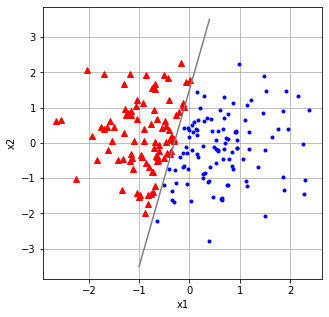

In [ ]:

# Разделяющая поверхность: w1 * x1 + w2 * x2 + b = 0
def line(x1, x2):
    return 10 * x1 - 2 * x2 + 3

# служебная функция 
def line_x1(x1):
    return (10 * x1 + 3) / 2


# генерируем случайные точки
np.random.seed(0)
x1x2 = np.random.randn(200, 2)

plt.figure(figsize=(5, 5))
# рисуем сгенерированные точки
for x1, x2 in x1x2:
    value = line(x1, x2)

    # https://devpractice.ru/matplotlib-lesson-4-2-stack-stem-scatter/
    # https://pyprog.pro/mpl/mpl_plot.html
    if (value > 0): # зелёные — выше линии
        plt.plot(x1, x2, 'b.') # , color='seagreen'
    elif (value < 0): # красные — ниже линии
        plt.plot(x1, x2, 'r^') # , color='darkred'

# нормализация осей
# plt.gca().set_aspect('equal', adjustable='box')
            
# рисуем разделяющую поверхность
x1_range = np.arange(-1.0, 0.5, 0.1)
plt.plot(x1_range, line_x1(x1_range), color='gray')

# Подписываем оси
plt.xlabel('x1')
plt.ylabel('x2')
  
plt.grid(True)
plt.show()


4. Для задания 3 рассчитайте среднее расстояние от точек до разделяющей поверхности и отобразите только те точки, расстояние до которых больше среднего


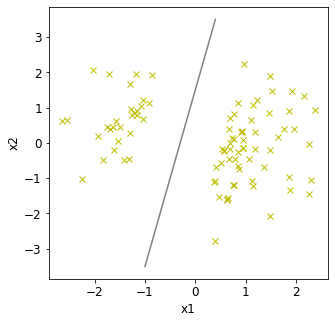

In [ ]:
# строим массив расстояний до прямой
distances = np.array([])
for x1, x2 in x1x2:
    value = line(x1, x2)
    distances = np.append(distances, value) #складываем значения ВЫШЕ линии в массив

# среднее значение для массива distances
mean = np.mean(np.abs(distances)) 

plt.figure(figsize=(5, 5))

# выбираем точки
for i, x12 in enumerate(x1x2): 
    if distances[i] < -mean or distances[i] > mean: 
        plt.plot(x12[0], x12[1], 'yx')
        
# рисуем разделяющую поверхность
plt.plot(x1_range, line_x1(x1_range), color='gray')

# Подписываем оси
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()


# ДЗ ПРО


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html

# https://www.publish.ru/articles/200403_4050359 — CIELab - измерение цвета на различных материалах

# https://ru.stackoverflow.com/questions/1109206/Динамический-цвет-точек-в-scatter-plot

import itertools


1. Написать функцию, для семплирования 1000 точек из 3-х мерной сферы с координатами  цветового пространства LAB (https://en.wikipedia.org/wiki/CIELAB_color_space)
Визуализировать результат в 3-х мерной проекции


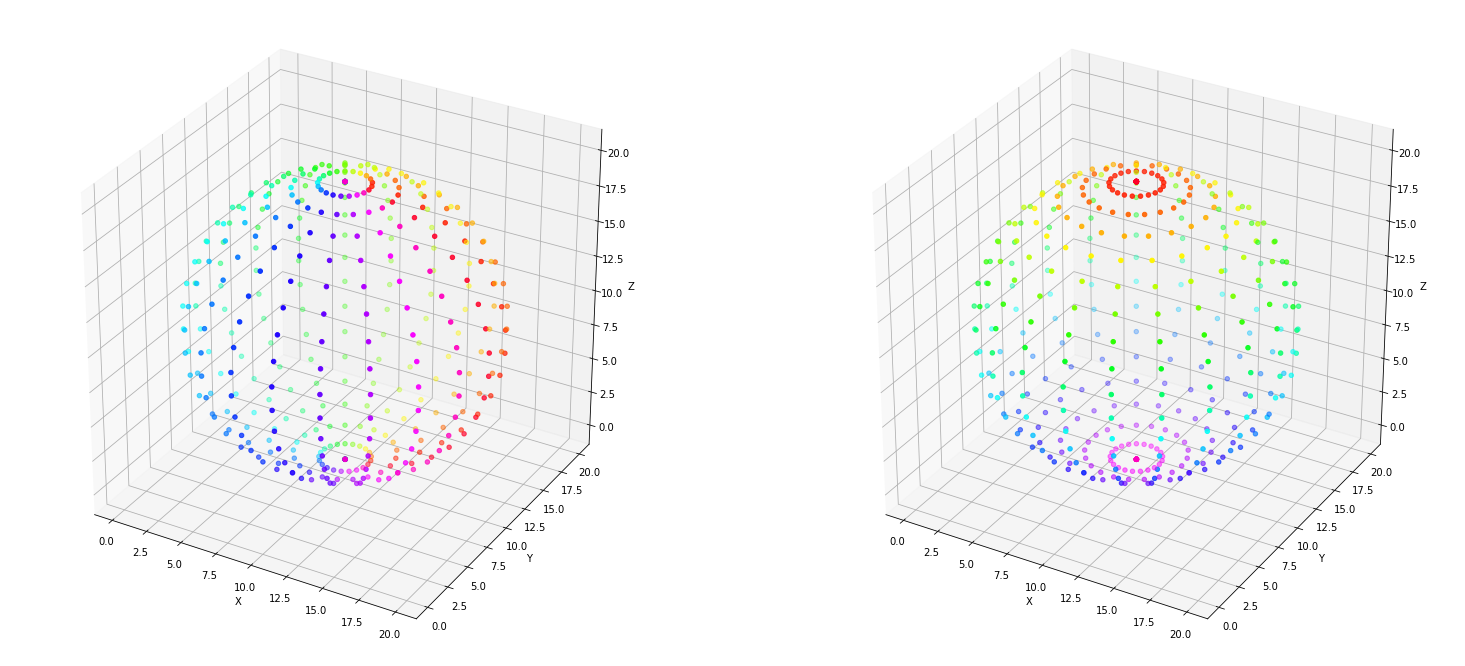

In [ ]:
# cmaps['Miscellaneous'] = [
#             'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
#             'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
#             'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

fig = plt.figure(figsize=(26, 12))

n = 21
k = 20
x = np.linspace(0.0, 1.0, k) 
# продублировать каждый элемент n раз
c_v = list(itertools.chain.from_iterable(itertools.repeat(i, n) for i in x))

# продублировать список k раз
temp = [1  for i in range(n)]
c_h = list([ele * tele for tele in temp for ele in x])

cmap='gist_rainbow'

# Make data
u = np.linspace(0, np.pi*(2 - 2./n), n)
v = np.linspace(0, np.pi, k)
x = 10 * np.outer(np.cos(u), np.sin(v))+10
y = 10 * np.outer(np.sin(u), np.sin(v))+10
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))+10

ax = fig.add_subplot(1, 2, 1, projection='3d')
# Plot the surface
# ax.plot_surface(x, y, z, color='b')
# ax.scatter(x, y, z, color='b')
ax.scatter(x, y, z, marker='o', c=c_v, cmap=cmap)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(x, y, z, marker='o', c=c_h, cmap=cmap)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()         

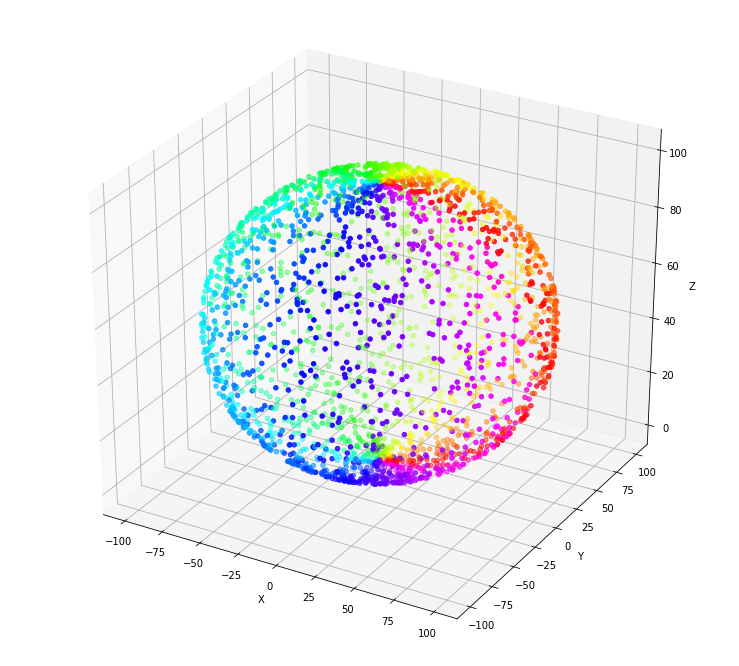

In [ ]:
def Lab_calculater(n):
  rL = 50     # L изменяется в промежутке от 0 до 100
  ra = 100    # a изменяется в промежутке от -100 до 100
  rb = 100    # b изменяется в промежутке от -100 до 100
  # n - количество генерируемых точек
  pi = np.pi
  (a0, b0, L0) = (0, 0, rL)    # координаты центра сферы
  L = []
  a = []
  b = []
  c_ = []

  for i in range(n):
    x = np.random.random() 
    u = x * 2 * pi
    v = np.random.random() * pi
    a.append(a0 + ra * np.cos(u) * np.sin(v))
    b.append(b0 + rb * np.sin(u) * np.sin(v))
    L.append(L0 + rL * np.cos(v))
    c_.append(x)
  return [L, a, b, c_]

z, x, y, c_ = Lab_calculater(2500)
cmap='gist_rainbow'

fig = plt.figure(figsize=(13, 12))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='o', c=c_, cmap=cmap)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()     

2. Даны точки в двумерном пространстве
import numpy as np
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Построить разделяющую поверхность такую чтобы отделить друг от друга первые 20 и последние 20 точек из X
( [0] * 20 + [1] * 20 )
Нарисовать график


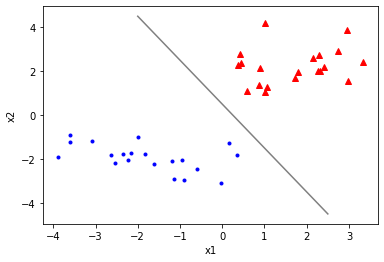

In [9]:
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]

# рисуем сгенерированные точки
for i, x12 in enumerate(X):
    if (i < 20): 
        plt.plot(x12[0], x12[1], 'b.') # , color='seagreen'
    else: 
        plt.plot(x12[0], x12[1], 'r^') # , color='darkred'

def line(x):
  return -2*x + 0.5

# рисуем разделяющую поверхность
x1_range = np.arange(-2.0, 3.0, 0.5)
plt.plot(x1_range, line(x1_range), color='gray')

# Подписываем оси
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()